# 분류
지도학습은 레이블(Lable) 즉 명시적인 정답이 있는 데이가 주어진 상태에서 학습하는 머신러닝 방식이다.

## 앙상블 방법(Ensemble Method)
정형 데이터의 예측 분석 영역에서 분류 방법중 가장 각광을 받는 방법 중 하나.

### 배깅
- 랜덤 포레스트
: 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등 기존에 많이 사용됨.

### 부스팅
- 그래디언트 부스팅
: 뛰어난 예측 성능, 수행 시간이 너무 오래 걸림. 하지만 최근 예측 성능 발전시키면서 시간을 단축하여 정형 데이터의 분류 영역에서 활용도가 높은 알고리즘으로 자리 잡음.

## 결정 트리(Decision Tree)
: ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듬.
if/else 기반으로 나타냄.
가능한 가장 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 부류에 속할 수 있도록 결정해야한다.

- 루트 노드 (최상위)

- 규칙 노드

- 리프 노드

균일도를 기반으로 노드를 나눌 조건이 적당한지 아닌지 구분한다.
결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득지수와 지니 계수가 있습니다.

가장 큰 장점은 정보의 '균일도'라는 룰을 기반ㄴ으로 하여 알고리즘이 쉽고 직관적이다.
반면 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점입니다. 그래서 사전에 트리의 크기를 제한하는 튜닝이 필요하다.

### 정보 이득 / 엔트로피
주어진 데이터 집합의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높다. 같은 값이 섞여 있으면 엔트로피가 낮습니다.
정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 즉 (정보이득지수=1-엔트로피 지수) 입니다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정합니다.
즉, 정보 이득이 높은 속성을 기준으로 분할합니다.

### 지니 계수
불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등합니다.
머신러닝에서는 지니 계수가 낮을수록 데이터의 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할합니다.

### 결정 트리 파라미터

#### min_sample_split 
: 노드 분할하기 위한 최소한의 샘플 수 (디폴트 2). 종류가 달라도 더 나누지 않을 수 있다.

#### min_sample_leaf
: 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수. 종류가 달라도 더 나누지 않을 수 있다.

#### max_features
: 최적의 분할을 위해 조건!!을 만들 때 고려할 최대 피처(칼럼) 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행하게 된다.

고려해야 될 피처의 개수를 지정하면 한 조건을 만들 때 지정한 피처의 개수들로만 고려해서 조건을 만들어낸다.

하나의 피처로만 분류를 한다는 것이 아니다!

지니 계수가 낮은 피처들을 조건을 만들 때 중요하게 쓰일 피처로 지정하게 된다, 해당 조건으로 작업하는 방식이다.

P.196 읽어볼 것.

#### max_depth
: 트리의 최대 깊이를 규정. 디폴트는 None.

#### max_leaf_nodes
: 말단 노드(leaf)의 최대 개수.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train,X_test,y_train,t_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [30]:
from sklearn.tree import export_graphviz

In [31]:
# (어떤 모델 넣을건지 / ? / 결과 값의 해당하는 데이터 / 컬럼의 이름이 뭔지 정보 / ? )
export_graphviz(dt_clf,
                'iris.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

In [32]:
import graphviz

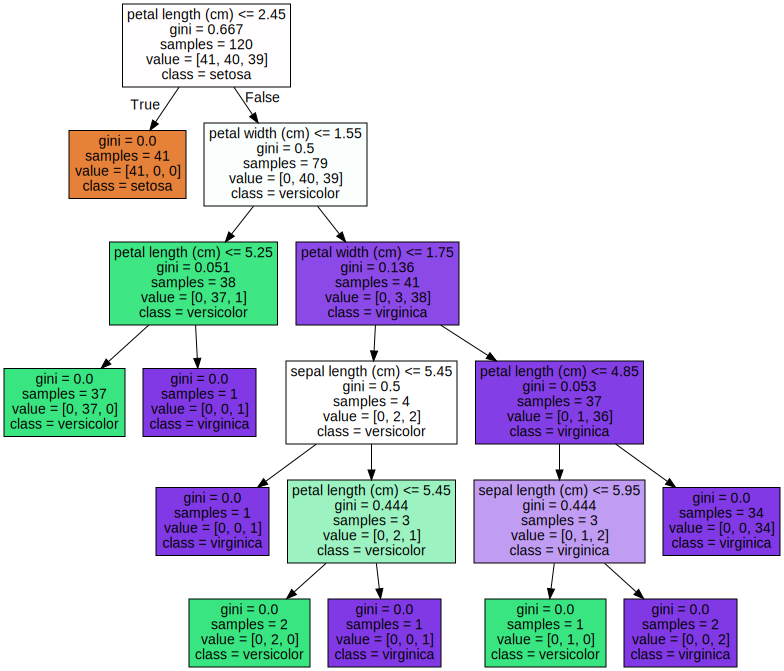

In [33]:
with open('iris.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

해설:
총 156개의 샘플 중에 조건에 만족하는 샘플이 총 120개 였고 거기서 부터 하위 조건으로 분류된다.

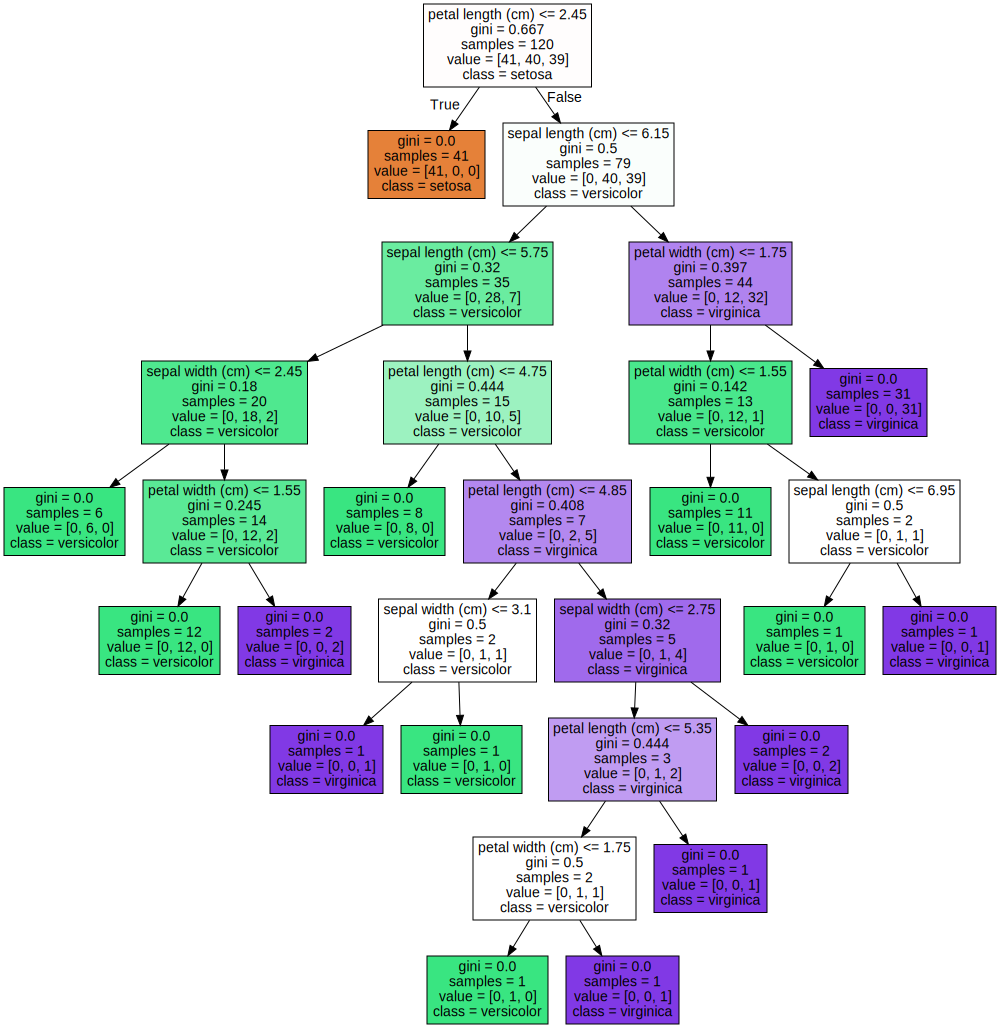

In [34]:
# 모델에 학습시킬 트리 생성하고 학습.
# random state 값 안넣어서 다양한 경우의 수로 그려질 수 있음.
dt_clf = DecisionTreeClassifier(random_state=156,max_features=1)
dt_clf.fit(X_train,y_train)

# 학습 된 모델을 그래프에 넣어줌.
export_graphviz(dt_clf,
                'iris1.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

# 모델 읽어서 그려줌
with open('iris1.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

- (참고)
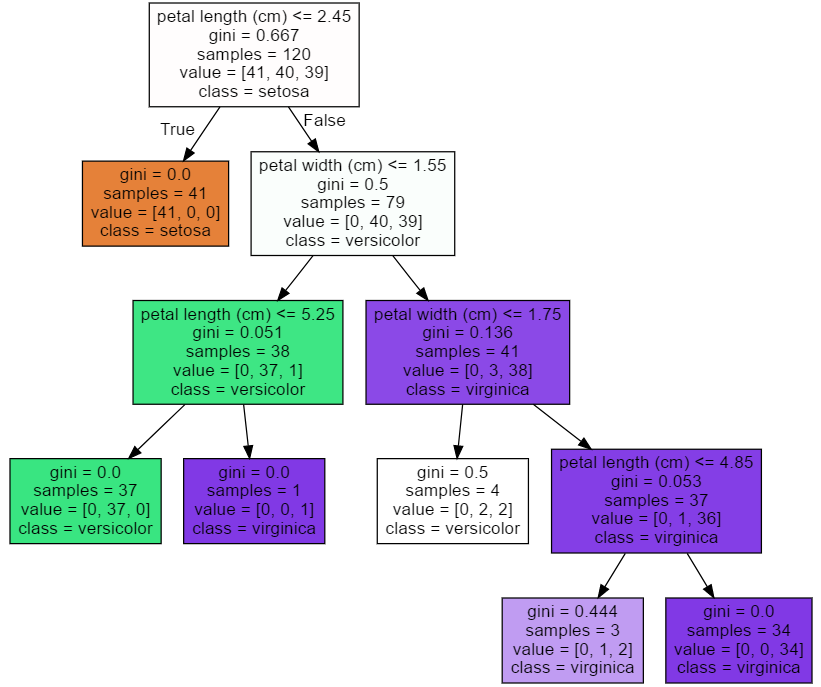
여기서
<br/>

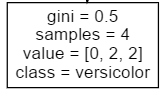
는 0,2,2 이지만 먼저 나온 2의 조건에 따라서 class명 붙여준다
<br/>

,max_features=None
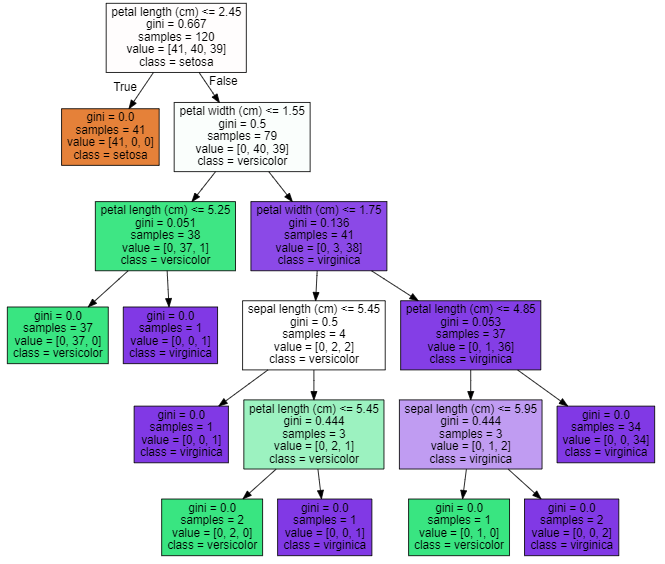
<br/>

,max_features=1
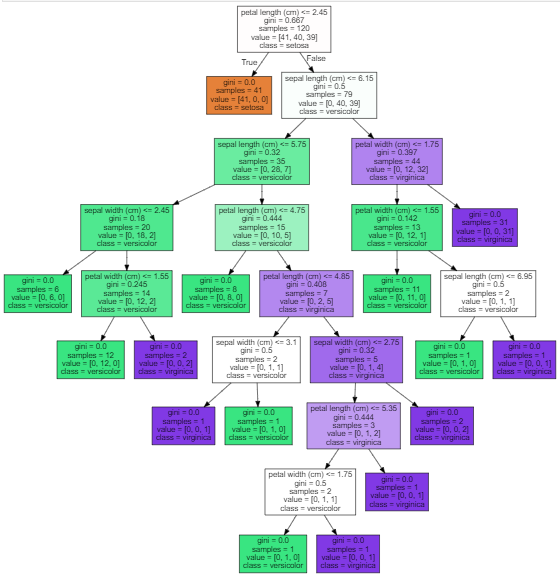
<br/>

,max_features=2
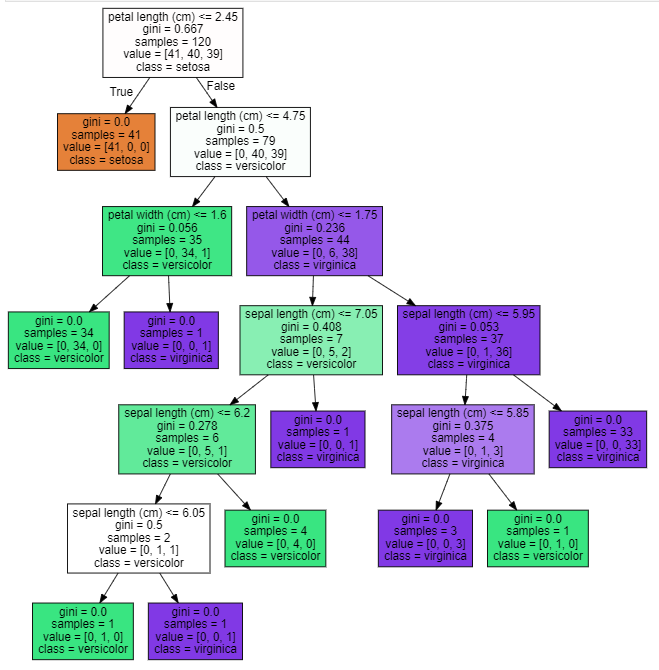

In [8]:
# 피처의 중요도(분류하는데 기준이 된 정도)를 알려준다.
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [9]:
# 모든 피처의 이름 확인
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# 막대 그래프로 수치값 확인해보자
import seaborn as sns

<AxesSubplot:>

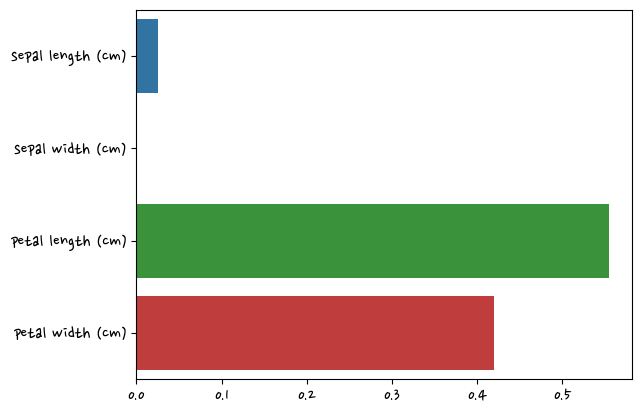

In [11]:
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

In [12]:
# 타이타닉 데이터로 실습

In [35]:
import func01
import pandas as pd

In [36]:
df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = func01.transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [37]:
# 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

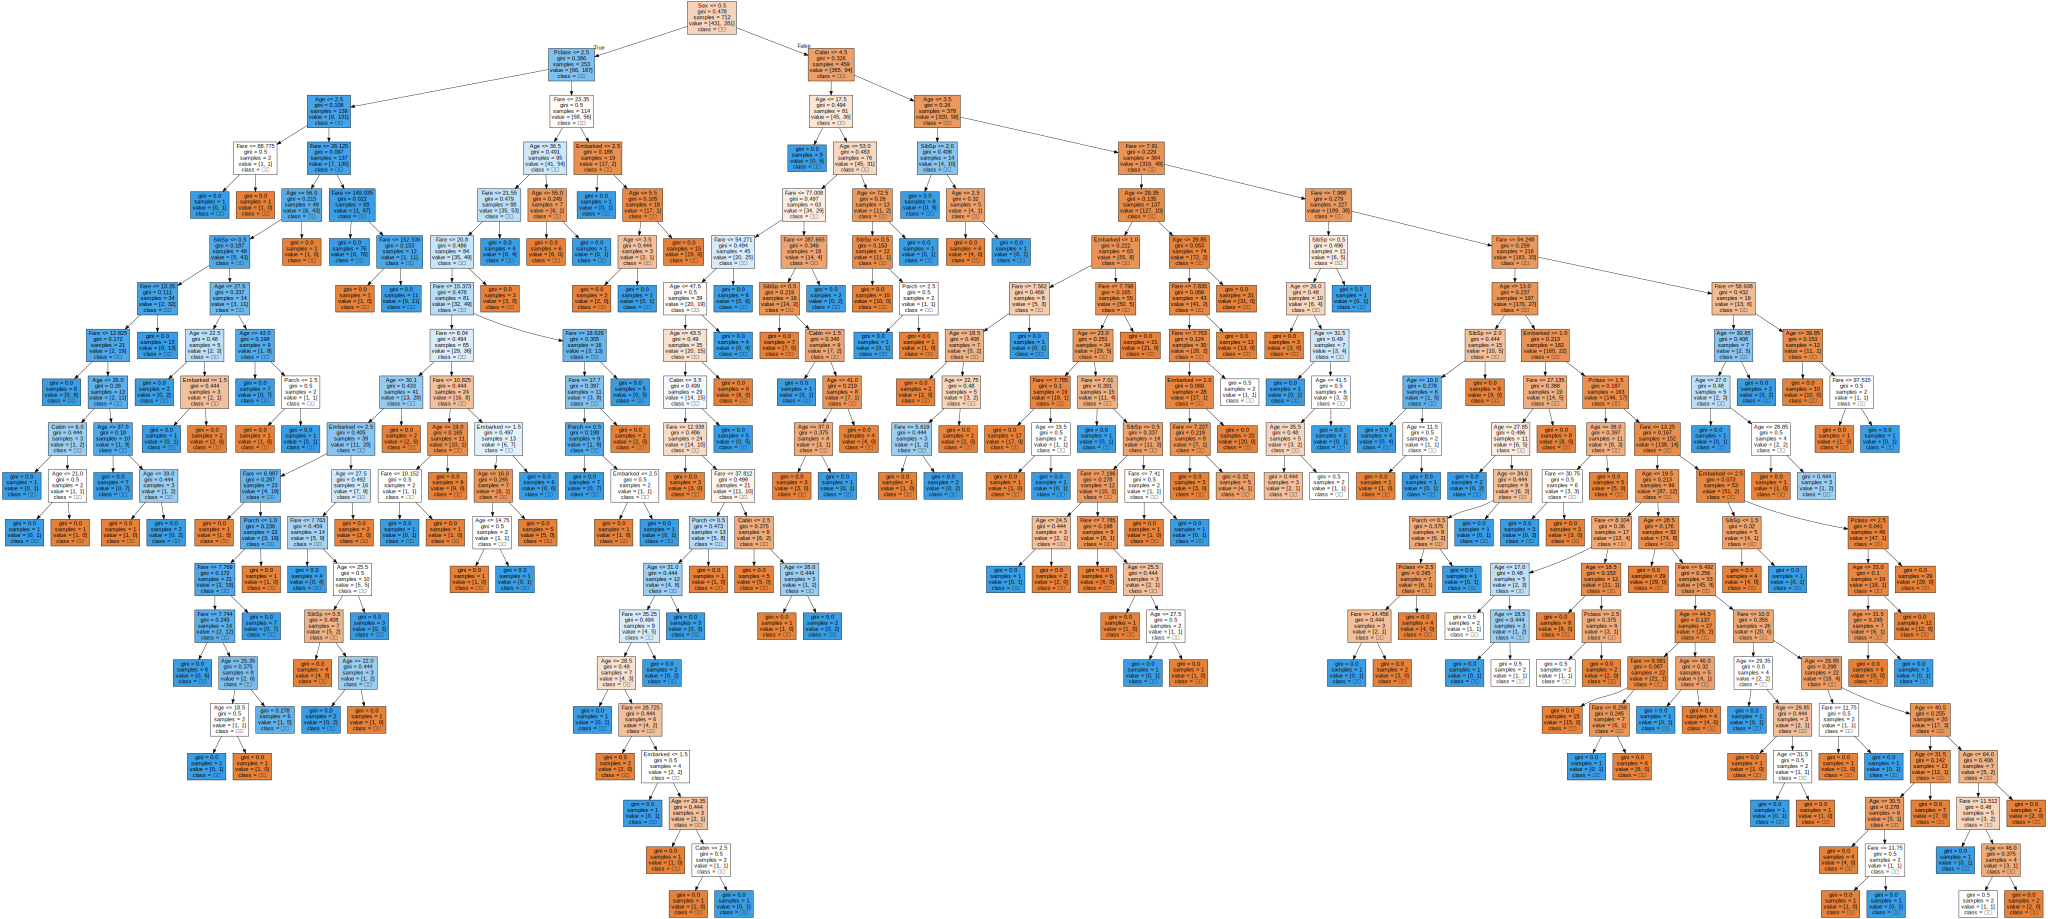

In [38]:
# 모델에 학습시킬 트리 생성하고 학습.
# random state 값 안넣어서 다양한 경우의 수로 그려질 수 있음.
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)

# 학습 된 모델을 그래프에 넣어줌.
export_graphviz(dt_clf,
                'titanic.dot',
                class_names=['사망','생존'],
                feature_names=X_train.columns,
                filled=True)

# 모델 읽어서 그려줌
with open('titanic.dot',encoding='utf-8') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## 결정 트리 과적합(Overfitting)

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [18]:
# (2차원의 두개의 컬럼 나옴 / / / / )
X, y = make_classification(n_features=2,n_redundant=-0,n_classes=3,n_clusters_per_class=1,random_state=0)

In [19]:
X

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516],
       [-0.04687748,  1.35489986],
       [ 1.20888898,  0.64232637],
       [ 1.71173001, -1.04637674],
       [ 1.29670808, -0.6054158 ],
       [ 1.24188996, -0.3819388 ],
       [-1.78273822,  1.52817583],
       [-1.50514147,  1.27186707],
       [ 0.87163989, -0.42276158],
       [ 2.53026908, -1.61974843],
       [ 0.95000368,  1.83240861],
       [-1.53716448, -0.89497353],
       [-2.13650855,  2.73389996],
       [ 1.01037788,  0.59402713],
       [ 1.9876467 , -0.22375521],
       [ 1.12463497,  2.13646176],
       [-0.65122279,  0.97865617],
       [ 0.85144036,  0.42548085],
       [-0.10789457, -0.65942376],
       [-0.41699944,

In [20]:
y

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


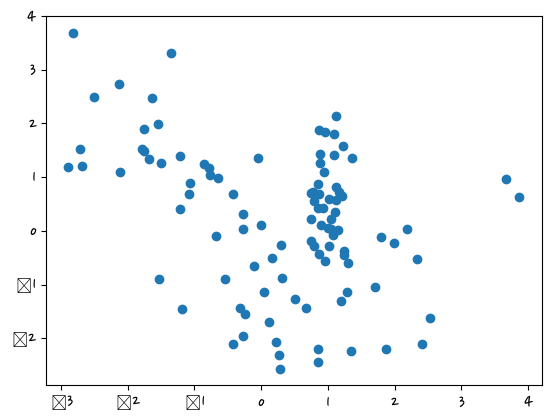

In [21]:
plt.scatter(X[:,0],X[:,1])

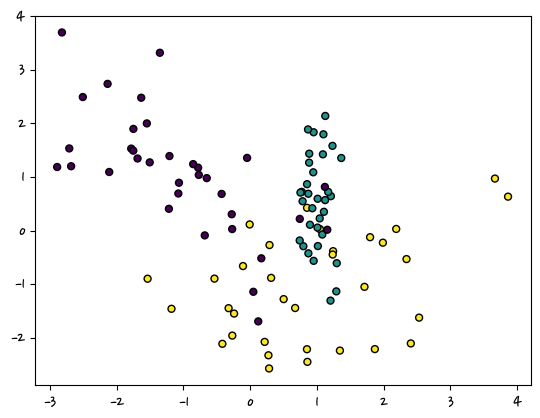

In [23]:
# 마이너스 문자 폰트 깨지는거 방지
plt.rcParams['axes.unicode_minus']=False
# c 값으로 세가지 색이 다르게 들어가게 설정
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',s=25)

In [24]:
# 과적합 모델 생성
dt_clf = DecisionTreeClassifier(random_state=156).fit(X,y)

C:\pythonDir\05_macine_learning\func01.py:57: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


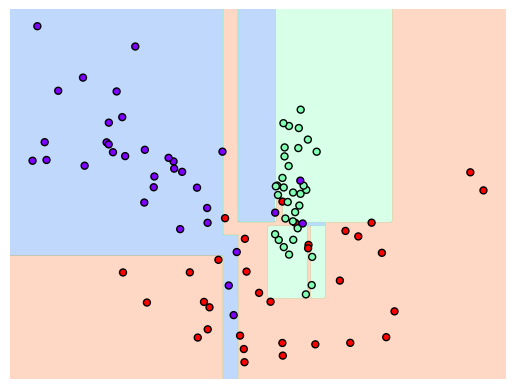

In [25]:
func01.visualize_boundary(dt_clf,X,y)
# 특이값들 까지 학습하려고 하니까 과적합 돼서 결정 경계 영역 이상해짐.

C:\pythonDir\05_macine_learning\func01.py:57: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


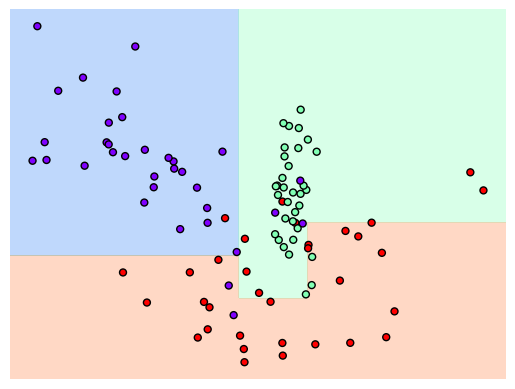

In [26]:
# 과적합 모델에 leaf 값으로 제한을 줘서 모델을 단순하게 만들어서 결정 경계 영역 단조로워짐.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X,y)
func01.visualize_boundary(dt_clf,X,y)